# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
%matplotlib notebook

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
now = datetime.datetime.now()

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Creating base URL and empty dataframe
url = f'https://api.openweathermap.org/data/2.5/weather?APPID={api_key}&units=imperial&q='
data_df = pd.DataFrame({'City':[],
                        'Cloudiness':[],
                        'Country':[],
                        'Date':[],
                        'Humidity':[],
                        'Lat':[],
                        'Lng':[],
                        'Max_temp':[],
                        'Wind_speed':[]
                       })

In [5]:
#API request for each city and populating dataframe in the same loop
i = 0
for city in cities:    
    response_req = requests.get(url+city)
    response = response_req.json()

    if (response['cod'] == 200):
        i = i+1
        print(f'Processing Record {i} | {city}')
        print(response_req.url)

        data_df.loc[i,'City'] = city
        data_df.loc[i,'Cloudiness'] = response['clouds']['all']
        data_df.loc[i,'Country'] = response['sys']['country']
        data_df.loc[i,'Date'] = now.strftime("%Y-%m-%d") 
        data_df.loc[i,'Humidity'] = response['main']['humidity']
        data_df.loc[i,'Lat'] = response['coord']['lat']
        data_df.loc[i,'Lng'] = response['coord']['lon']
        data_df.loc[i,'Max_temp'] = response['main']['temp_max']
        data_df.loc[i,'Wind_speed'] = response['wind']['speed']
    else:
        print('City not found. Skipping')
            
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")  

Processing Record 1 | west odessa
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=west%20odessa
City not found. Skipping
Processing Record 2 | busselton
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=busselton
Processing Record 3 | qaanaaq
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=qaanaaq
City not found. Skipping
Processing Record 4 | tual
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=tual
Processing Record 5 | jamestown
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=jamestown
Processing Record 6 | kapaa
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=kapaa
Processing Record 7 | vaini
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88c

Processing Record 57 | punta arenas
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=punta%20arenas
Processing Record 58 | chokurdakh
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=chokurdakh
Processing Record 59 | ngawi
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=ngawi
Processing Record 60 | chapais
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=chapais
Processing Record 61 | lakatoro
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=lakatoro
Processing Record 62 | geraldton
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=geraldton
City not found. Skipping
Processing Record 63 | ilulissat
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6

Processing Record 112 | yulara
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=yulara
Processing Record 113 | bredasdorp
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=bredasdorp
Processing Record 114 | kavaratti
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=kavaratti
Processing Record 115 | ponta do sol
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=ponta%20do%20sol
Processing Record 116 | tuktoyaktuk
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=tuktoyaktuk
Processing Record 117 | kizukuri
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=kizukuri
Processing Record 118 | kaitangata
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d21

Processing Record 167 | bandarbeyla
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=bandarbeyla
Processing Record 168 | te anau
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=te%20anau
Processing Record 169 | victoria
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=victoria
Processing Record 170 | aksu
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=aksu
City not found. Skipping
Processing Record 171 | sokolovo
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=sokolovo
Processing Record 172 | palmaner
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=palmaner
Processing Record 173 | vanimo
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211

Processing Record 222 | mar del plata
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=mar%20del%20plata
Processing Record 223 | iglesias
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=iglesias
Processing Record 224 | atuona
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=atuona
Processing Record 225 | mandalgovi
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=mandalgovi
Processing Record 226 | harper
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=harper
Processing Record 227 | meulaboh
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=meulaboh
Processing Record 228 | puerto baquerizo moreno
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5

Processing Record 277 | placido de castro
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=placido%20de%20castro
Processing Record 278 | ust-tsilma
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=ust-tsilma
Processing Record 279 | la asuncion
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=la%20asuncion
Processing Record 280 | henties bay
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=henties%20bay
Processing Record 281 | klyuchi
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=klyuchi
City not found. Skipping
Processing Record 282 | vung tau
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=vung%20tau
Processing Record 283 | san quintin
https://api.openweath

Processing Record 332 | kang
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=kang
Processing Record 333 | sault sainte marie
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=sault%20sainte%20marie
Processing Record 334 | ossora
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=ossora
Processing Record 335 | vienne
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=vienne
City not found. Skipping
Processing Record 336 | komsomolskiy
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=komsomolskiy
Processing Record 337 | salamiyah
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=salamiyah
Processing Record 338 | pujehun
https://api.openweathermap.org/data/2.5/weather?A

Processing Record 386 | emerald
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=emerald
Processing Record 387 | zhezkazgan
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=zhezkazgan
Processing Record 388 | imeni poliny osipenko
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=imeni%20poliny%20osipenko
Processing Record 389 | bestobe
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=bestobe
Processing Record 390 | gaya
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=gaya
Processing Record 391 | rutland
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=rutland
Processing Record 392 | hobyo
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d

Processing Record 442 | kuusamo
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=kuusamo
Processing Record 443 | coari
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=coari
Processing Record 444 | vrangel
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=vrangel
Processing Record 445 | tarsus
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=tarsus
Processing Record 446 | north bend
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=north%20bend
Processing Record 447 | fez
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=fez
Processing Record 448 | faanui
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=faanui


Processing Record 497 | houma
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=houma
City not found. Skipping
Processing Record 498 | assiniboia
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=assiniboia
Processing Record 499 | shawville
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=shawville
Processing Record 500 | labuhan
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=labuhan
Processing Record 501 | alihe
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=alihe
Processing Record 502 | kaeo
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73fddea&units=imperial&q=kaeo
Processing Record 503 | sovetskiy
https://api.openweathermap.org/data/2.5/weather?APPID=5489a88ce6a5d211411d421cb73

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
data_df.to_csv('weather_data.csv')
data_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_temp,Wind_speed
1,west odessa,92.0,US,2018-10-15,86.0,31.84,-102.48,39.20,14.99
2,busselton,92.0,AU,2018-10-15,100.0,-33.64,115.35,60.65,4.38
3,qaanaaq,64.0,GL,2018-10-15,100.0,77.48,-69.36,14.12,4.38
4,tual,32.0,ID,2018-10-15,100.0,-5.67,132.75,82.07,1.19
5,jamestown,64.0,AU,2018-10-15,68.0,-33.21,138.60,58.58,15.79


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

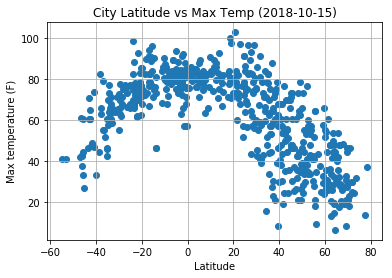

In [7]:
plt.figure()
plt.scatter(data_df['Lat'],data_df['Max_temp'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.title(f"City Latitude vs Max Temp ({data_df.iloc[0]['Date']})")
plt.savefig('LatvsTemp.png')


#### Latitude vs. Humidity Plot

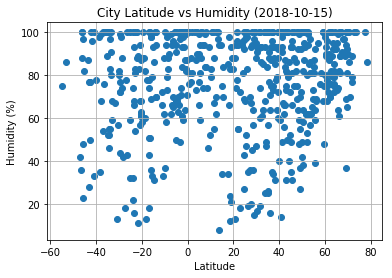

In [8]:
plt.figure()
plt.scatter(data_df['Lat'],data_df['Humidity'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs Humidity ({data_df.iloc[0]['Date']})")
plt.savefig('LatvsHumidity.png')

#### Latitude vs. Cloudiness Plot

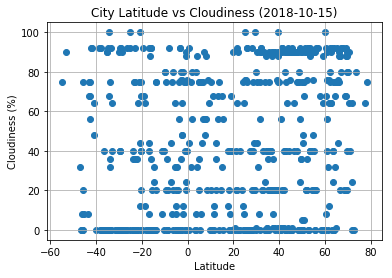

In [9]:
plt.figure()
plt.scatter(data_df['Lat'],data_df['Cloudiness'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs Cloudiness ({data_df.iloc[0]['Date']})")
plt.savefig('LatvsCloudiness.png')

#### Latitude vs. Wind Speed Plot

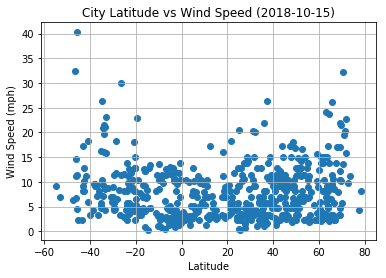

In [10]:
plt.figure()
plt.scatter(data_df['Lat'],data_df['Wind_speed'])
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs Wind Speed ({data_df.iloc[0]['Date']})")
plt.savefig('LatvsWindSpeed.png')